<a href="https://colab.research.google.com/github/KorvenDalas/FYP_w1834001/blob/main/FYP_w1834001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from scipy.io import arff
import pandas as pd
import numpy as np

datasets_arff = ['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']

def load_df_arff(df_arff_list):
    df_list = []
    for i in range(len(df_arff_list)):
        data = arff.loadarff(df_arff_list[i])
        df = pd.DataFrame(data[0])
        df_list.append(df)
    return df_list

df = pd.concat(load_df_arff(datasets_arff), ignore_index = True)
print(df)

          Attr1    Attr2     Attr3    Attr4     Attr5    Attr6     Attr7  \
0      0.200550  0.37951  0.396410  2.04720   32.3510  0.38825  0.249760   
1      0.209120  0.49988  0.472250  1.94470   14.7860  0.00000  0.258340   
2      0.248660  0.69592  0.267130  1.55480   -1.1523  0.00000  0.309060   
3      0.081483  0.30734  0.458790  2.49280   51.9520  0.14988  0.092704   
4      0.187320  0.61323  0.229600  1.40630   -7.3128  0.18732  0.187320   
...         ...      ...       ...      ...       ...      ...       ...   
43400  0.012898  0.70621  0.038857  1.17220  -18.9070  0.00000  0.013981   
43401 -0.578050  0.96702 -0.800850  0.16576  -67.3650 -0.57805 -0.578050   
43402 -0.179050  1.25530 -0.275990  0.74554 -120.4400 -0.17905 -0.154930   
43403 -0.108860  0.74394  0.015449  1.08780  -17.0030 -0.10886 -0.109180   
43404 -0.105370  0.53629 -0.045578  0.91478  -56.0680 -0.10537 -0.109940   

         Attr8    Attr9    Attr10  ...    Attr56    Attr57   Attr58    Attr59  \
0     

In [17]:
print(type(df['Attr1'][0]))
print(type(df['class'][0]))

<class 'numpy.float64'>
<class 'bytes'>


In [18]:
print(int.from_bytes(df['class'][0], byteorder = 'big'))
print(int.from_bytes(df['class'][43404], byteorder = 'big'))

48
49


In [19]:
# Convert 'class' column to integers and then replace based on conditions
if type(df['class'][0]) == bytes:
    df['class'] = df['class'].apply(lambda x: int.from_bytes(x, byteorder='big'))
    df['class'] = np.where(df['class'] == 48, 0.0, 1.0)

print(df)

          Attr1    Attr2     Attr3    Attr4     Attr5    Attr6     Attr7  \
0      0.200550  0.37951  0.396410  2.04720   32.3510  0.38825  0.249760   
1      0.209120  0.49988  0.472250  1.94470   14.7860  0.00000  0.258340   
2      0.248660  0.69592  0.267130  1.55480   -1.1523  0.00000  0.309060   
3      0.081483  0.30734  0.458790  2.49280   51.9520  0.14988  0.092704   
4      0.187320  0.61323  0.229600  1.40630   -7.3128  0.18732  0.187320   
...         ...      ...       ...      ...       ...      ...       ...   
43400  0.012898  0.70621  0.038857  1.17220  -18.9070  0.00000  0.013981   
43401 -0.578050  0.96702 -0.800850  0.16576  -67.3650 -0.57805 -0.578050   
43402 -0.179050  1.25530 -0.275990  0.74554 -120.4400 -0.17905 -0.154930   
43403 -0.108860  0.74394  0.015449  1.08780  -17.0030 -0.10886 -0.109180   
43404 -0.105370  0.53629 -0.045578  0.91478  -56.0680 -0.10537 -0.109940   

         Attr8    Attr9    Attr10  ...    Attr56    Attr57   Attr58    Attr59  \
0     

In [20]:
print(type(df['Attr1'][0]))
df = df.astype(np.float32)
print(type(df['Attr1'][0]))

<class 'numpy.float64'>
<class 'numpy.float32'>


In [21]:
df = df.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [22]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621960e+01,-0.010510,3.002645e+01,1.333288,4.480858e+02,17.033201,1.502328e+03,9.343074,72.788589,0.048174
std,2.994109,5.842748,5.439429,295.434418,6.124303e+04,7.201326,5.713075,505.894287,62.932732,14.670597,...,5.327862e+03,13.674072,5.334454e+03,122.104439,3.234560e+04,553.049438,1.392667e+05,124.177353,2369.339355,0.214137
min,-463.890015,-430.869995,-479.959991,-0.403110,-1.190300e+07,-508.410004,-517.479980,-141.410004,-3.496000,-479.910004,...,-1.108300e+06,-1667.300049,-1.986900e+02,-327.970001,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,9.348501e-03,0.014648,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,0.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,0.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394501,1.172200e+02,8.598850,9.776200,0.000000
max,94.279999,480.959991,28.336000,53433.000000,1.250100e+06,543.250000,649.229980,53432.000000,9742.299805,1099.500000,...,2.931500e+02,552.640015,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [23]:
#checking for imbalance
df['class'].value_counts()

class
0.0    41314
1.0     2091
Name: count, dtype: int64

In [24]:
def drop_nan_rows(dataset):
    df_empty_values = dataset.dropna(axis = 0, how = 'any')
    print('Original Length =', len(dataset), '\n',
          'Cleaned Length =', len(df_empty_values), '\n',
          'Missing Data =', len(dataset)-len(df_empty_values), '\n',
          '% of Rows Missing = ', round((len(dataset)-len(df_empty_values)) * 100 / len(dataset), 3), '\n')
    return df_empty_values

nan_rows = drop_nan_rows(df)

Original Length = 43405 
 Cleaned Length = 19967 
 Missing Data = 23438 
 % of Rows Missing =  53.998 



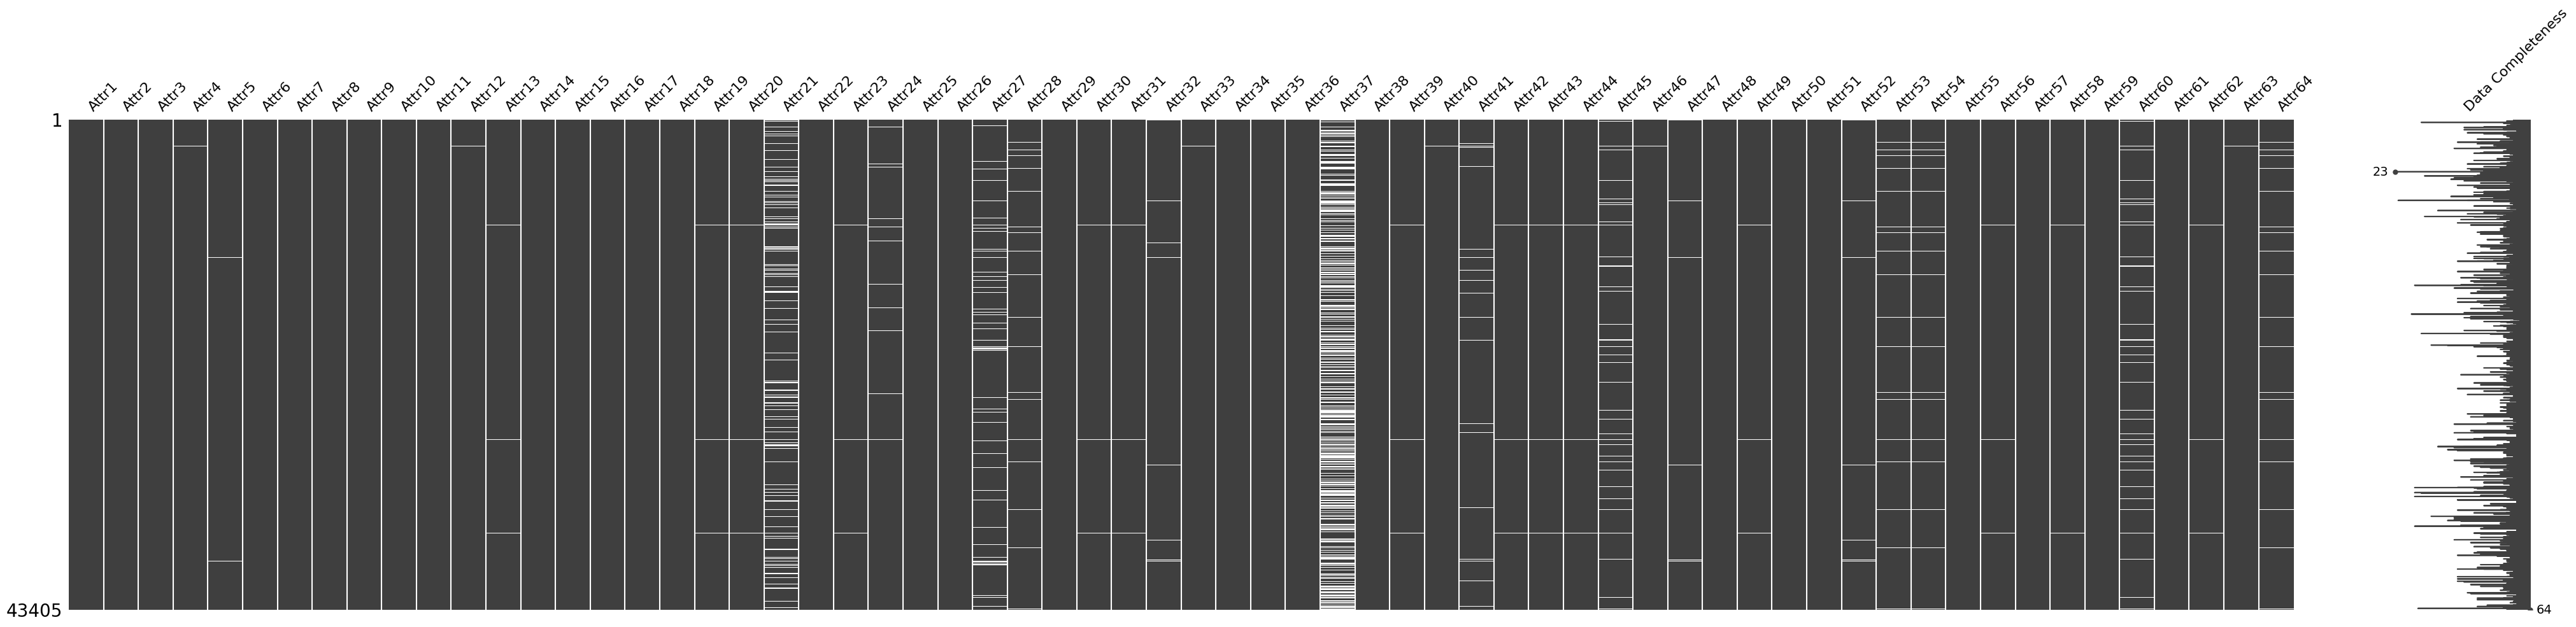

In [25]:
import missingno as msno

def sparsity_matrix(dataset):
    df_null_values = dataset.columns[dataset.isnull().any()].tolist()
    msno.matrix(dataset[df_null_values], figsize = (50,10), labels = True)

sparsity_matrix(df)

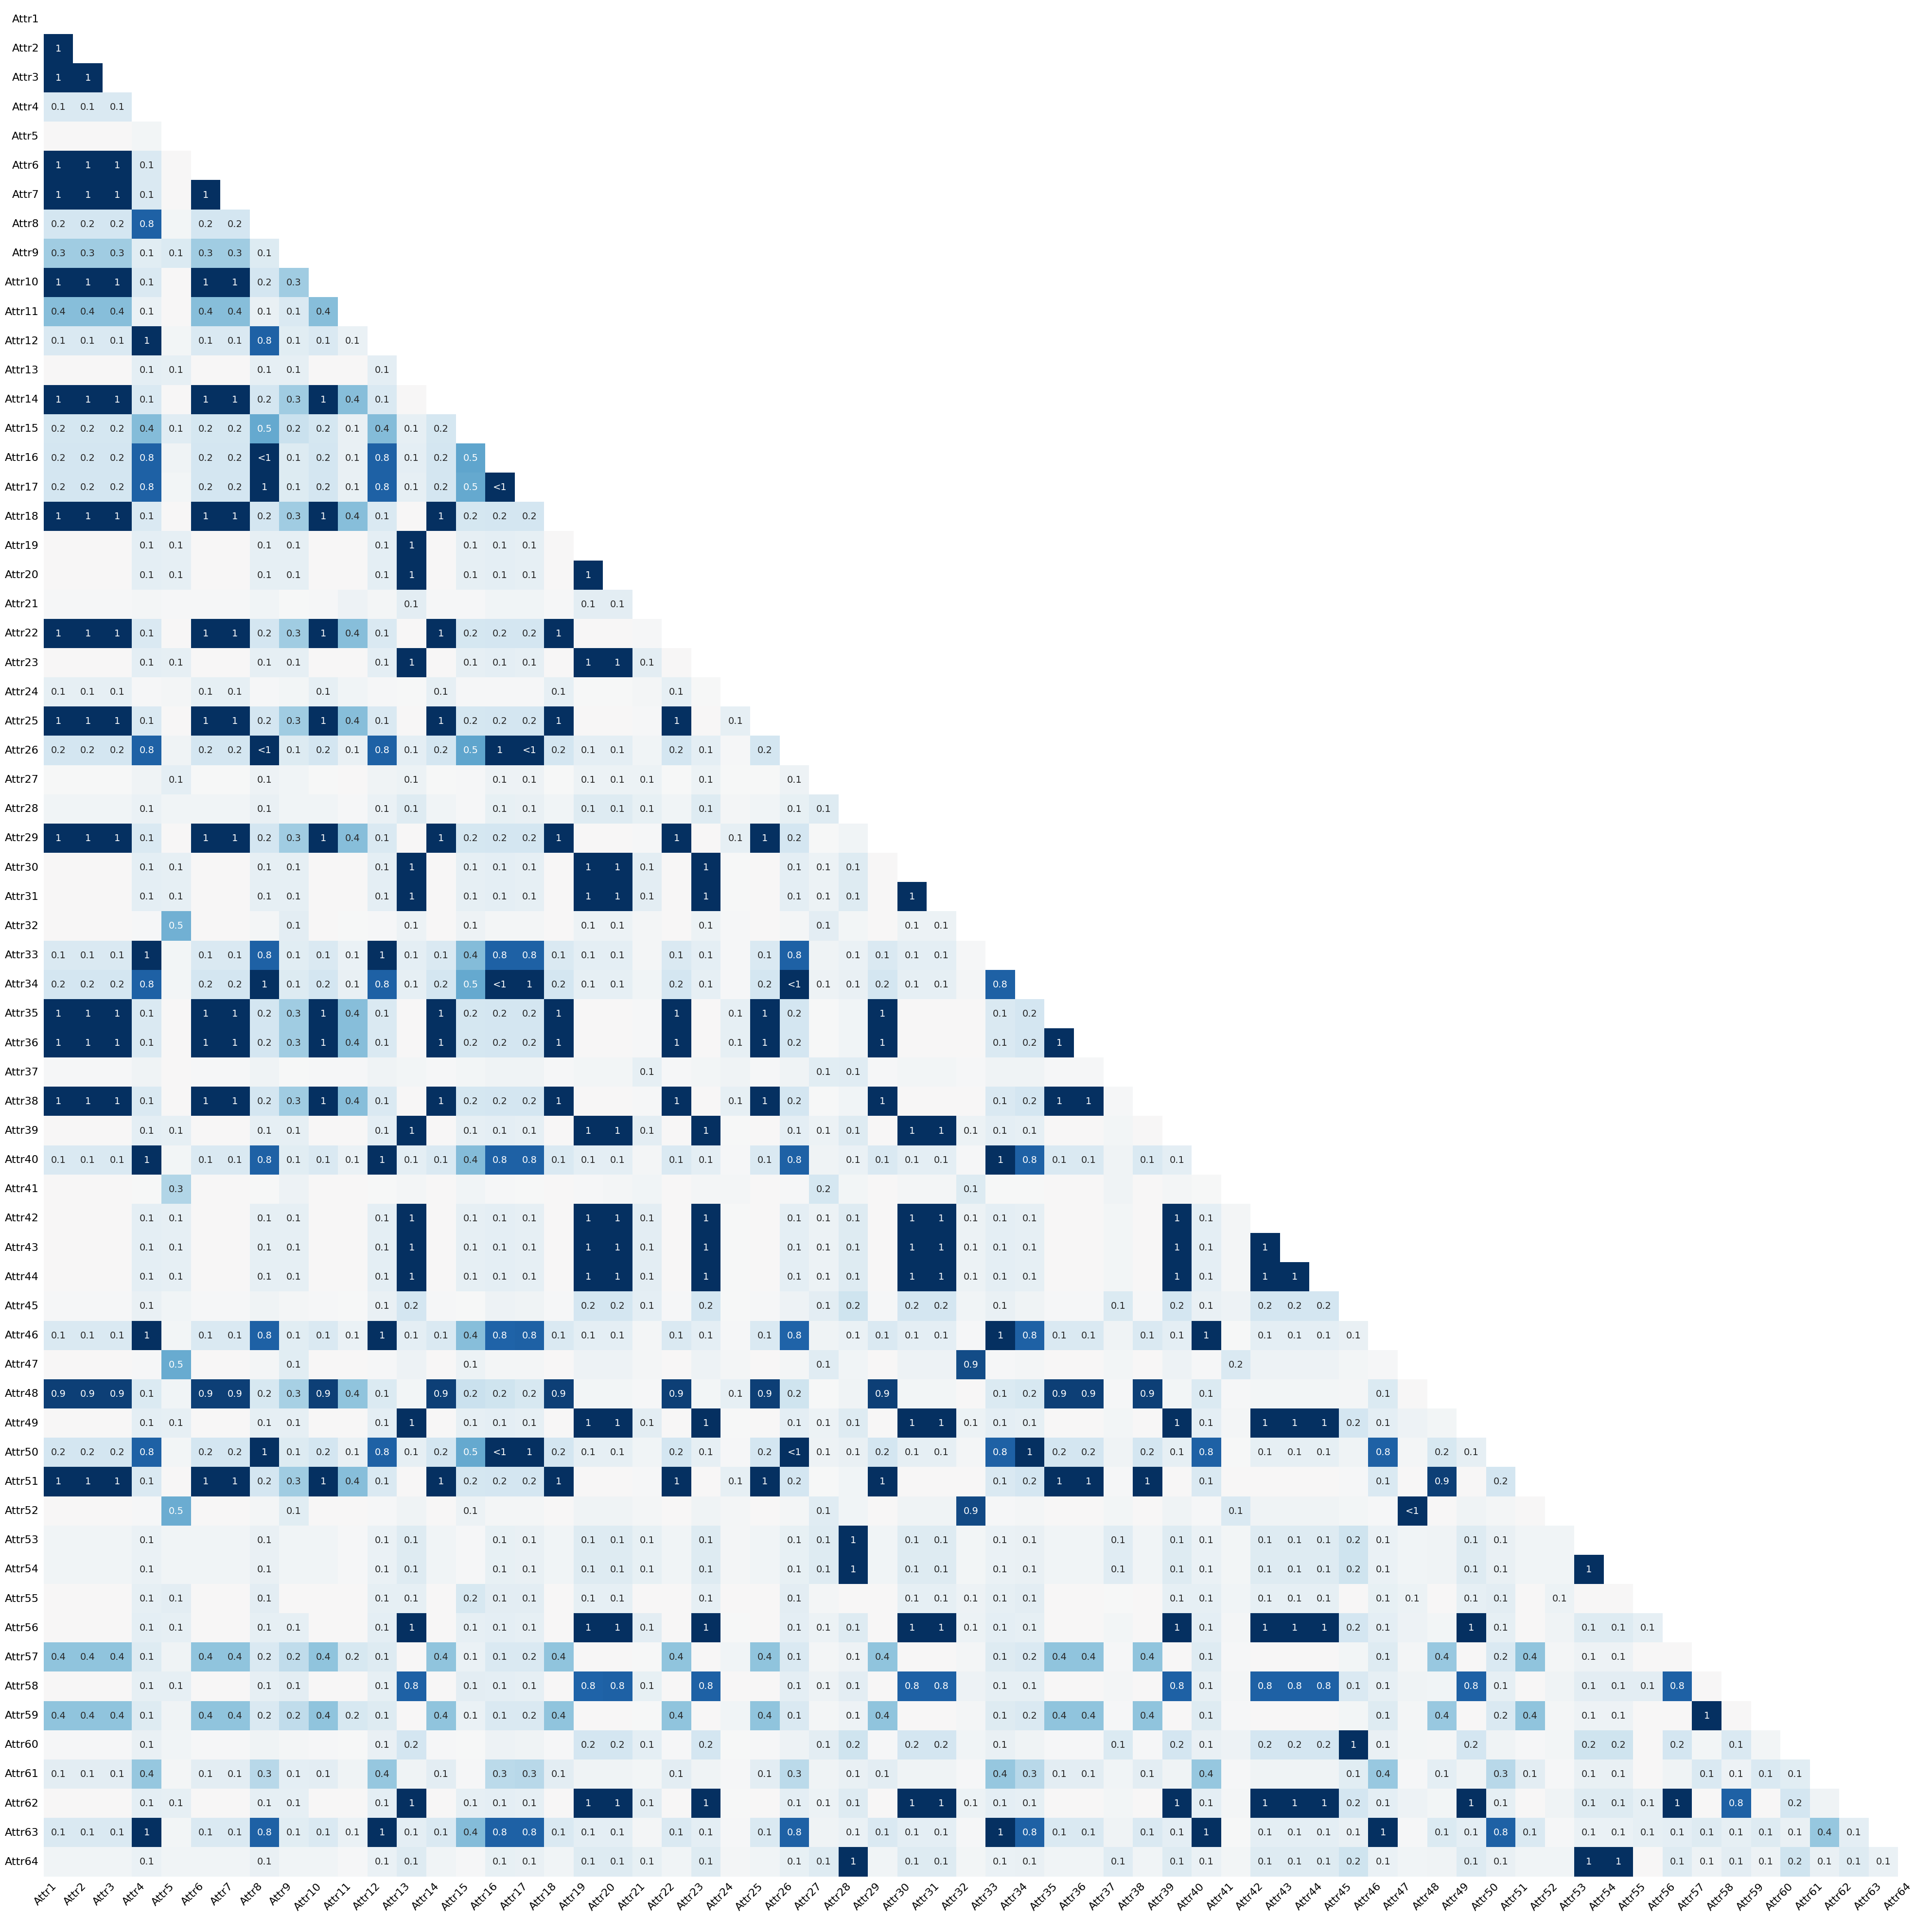

In [26]:
def heatmap_correlation(dataset):
    df_null_values = dataset.columns[dataset.isnull().any()].tolist()
    msno.heatmap(dataset[df_null_values], figsize = (50, 50), cbar = False)

heatmap_correlation(df)

In [27]:
correlation_matrix = df.corr()

column_corr_21 = correlation_matrix['Attr21']
column_corr_37 = correlation_matrix['Attr37']

for i in column_corr_21:
    if 0.3 < abs(i) < 1:
        print('Column 21 has a strong correlation')

for i in column_corr_37:
    if 0.3 < abs(i) < 1:
        print('Column 37 has a strong correlation')

In [28]:
def mean_imputation(dataset):
    df_copy = dataset.copy()
    for column in df_copy.columns:
        mean_value = df_copy[column].mean()
        df_copy[column].fillna(mean_value, inplace = True)
    return df_copy

df_mean_imputed = mean_imputation(df)

In [29]:
#print(df_mean_imputed)
test_nan_rows = drop_nan_rows(df_mean_imputed)

Original Length = 43405 
 Cleaned Length = 43405 
 Missing Data = 0 
 % of Rows Missing =  0.0 



In [30]:
from sklearn.impute import KNNImputer

def knn_imputation(dataset, k = 5):
    df_copy = dataset.copy()
    imputer = KNNImputer(n_neighbors = k)
    return pd.DataFrame(imputer.fit_transform(df_copy), columns = dataset.columns, index = dataset.index)

df_knn_imputed = knn_imputation(df, k = 64)

In [31]:
#print(df_knn_imputed)
test_nan_rows = drop_nan_rows(df_knn_imputed)

Original Length = 43405 
 Cleaned Length = 43405 
 Missing Data = 0 
 % of Rows Missing =  0.0 



In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

def LR_imputation(dataset):
    df_copy = dataset.copy()
    imputer = IterativeImputer(estimator = LinearRegression(), max_iter = 10, random_state = 42)
    return pd.DataFrame(imputer.fit_transform(df_copy), columns = dataset.columns, index = dataset.index)

df_lr_imputed = LR_imputation(df)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [33]:
#print(df_lr_imputed)
test_nan_rows = drop_nan_rows(df_lr_imputed)

Original Length = 43405 
 Cleaned Length = 43405 
 Missing Data = 0 
 % of Rows Missing =  0.0 



In [34]:
dfs = []
dfs.append(df_mean_imputed)
dfs.append(df_knn_imputed)
dfs.append(df_lr_imputed)
dfs_names = ["mean", "knn", "lr"]

In [35]:
# Split the features and labels into separate dataframes for all the original dataframes
def split_feature_label (datasets):
    feature = []
    label = []
    for i in range(len(datasets)):
        feature.append(pd.DataFrame(datasets[i].iloc[:, :-1].values))
        label.append(pd.DataFrame(datasets[i].iloc[:, -1].values))
    return feature, label

Xs, Ys = split_feature_label(dfs)

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
for i in range(len(Xs)):
    Xs[i] = sc.fit_transform(Xs[i])
    #
    #Xs[i] = pd.DataFrame(scaled_data, columns = Xs[i].columns)

In [37]:
from sklearn.model_selection import train_test_split

def split_training_testing(dfs_feature, dfs_label, test_size = 0.2):
    dfs_feature_train = []
    dfs_feature_test = []
    dfs_label_train = []
    dfs_label_test = []
    for i in range(len(dfs_feature)):
        feature_train, feature_test, label_train, label_test = train_test_split(dfs_feature[i], dfs_label[i], test_size = test_size, random_state = 42)
        dfs_feature_train.append(feature_train)
        dfs_feature_test.append(feature_test)
        dfs_label_train.append(label_train)
        dfs_label_test.append(label_test)

    return dfs_feature_train, dfs_feature_test, dfs_label_train, dfs_label_test

Xs_train, Xs_test, Ys_train, Ys_test = split_training_testing(Xs, Ys, 0.2)

In [38]:
from imblearn.over_sampling import SMOTE

def oversample_data_SMOTE(dfs_feature, dfs_label):
    smote = SMOTE(sampling_strategy='auto', random_state = 42)
    #Split the features and labels for each dataframe
    dfs_res_feature = []
    dfs_res_label = []
    for i in range(len(dfs_feature)):
        print("Dataset " + dfs_names[i])
        print(dfs_label[i].value_counts())
        res_feature, res_label = smote.fit_resample(dfs_feature[i], dfs_label[i])
        print("\nAfter SMOTE ------")
        print(res_label.value_counts())
        print()
        dfs_res_feature.append(res_feature)
        dfs_res_label.append(res_label)
    return dfs_res_feature, dfs_res_label

Xs_train_balanced, Ys_train_balanced = oversample_data_SMOTE(Xs_train, Ys_train)

Dataset mean
0.0    33062
1.0     1662
Name: count, dtype: int64

After SMOTE ------
0.0    33062
1.0    33062
Name: count, dtype: int64

Dataset knn
0.0    33062
1.0     1662
Name: count, dtype: int64

After SMOTE ------
0.0    33062
1.0    33062
Name: count, dtype: int64

Dataset lr
0.0    33062
1.0     1662
Name: count, dtype: int64

After SMOTE ------
0.0    33062
1.0    33062
Name: count, dtype: int64



In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_model(model, X_test, Y_test):
    # Predicting the probabilities
    pred = model.predict(X_test)
    # Converting probabilities to class labels
    pred_classes = (pred > 0.5).astype("int32")
    evaluation = {}

    # Calculating evaluation metrics
    accuracy = accuracy_score(Y_test, pred_classes)
    precision = precision_score(Y_test, pred_classes)
    recall = recall_score(Y_test, pred_classes)
    evaluation["Accuracy"] = accuracy
    evaluation["Precision"] = precision
    evaluation["Recall"] = recall

    # Printing the results
    print("Neural Network:\n" + "-" * 15)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    return evaluation


# Model 01 - NN 64_128_64_1

In [41]:
# Create the model
def nn_64_128_64():
    nn = Sequential([
        Dense(128, activation = 'relu', input_dim = 64),  # Input layer & first hidden layer
        Dense(64, activation = 'relu'),                        # Second hidden layer
        Dense(1, activation = 'sigmoid')                      # Output layer
        ])
    nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return nn

models_01 = []
for i in range (3):
    models_01.append(nn_64_128_64())

In [42]:
for i in range (3):
    models_01[i].fit(Xs_train_balanced[i], Ys_train_balanced[i], batch_size = 32, epochs = 25, verbose = 0)

In [43]:
evaluation_model_01 = []
for i in range(3):
    evaluation_model_01.append(evaluate_model(models_01[i], Xs_test[i], Ys_test[i]))

272/272 [==============================] - 1s 3ms/step
Neural Network:
---------------
Accuracy: 0.9346
Precision: 0.3952
Recall: 0.6107
272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.9157
Precision: 0.2560
Recall: 0.3706
272/272 [==============================] - 0s 2ms/step
Neural Network:
---------------
Accuracy: 0.8928
Precision: 0.2794
Recall: 0.7413


# Model 01 - NN 64_128_64_1 with BatchNormalisation and Dropout

In [44]:
from keras.layers import Dropout, BatchNormalization, LeakyReLU
from keras.regularizers import l2

def enhanced_nn_64_128_64():
    nn = Sequential([
        Dense(128, activation = 'relu', input_dim = 64, kernel_regularizer = l2(0.01)),
        Dropout(0.5),
        BatchNormalization(),
        Dense(64, activation = 'relu', kernel_regularizer = l2(0.01)),
        Dropout(0.5),
        BatchNormalization(),
        Dense(1, activation = 'sigmoid')
    ])
    nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return nn

models_01_enhanced = []
for i in range (3):
    models_01_enhanced.append(enhanced_nn_64_128_64())

In [45]:
for i in range (3):
    models_01_enhanced[i].fit(Xs_train_balanced[i], Ys_train_balanced[i], batch_size = 32, epochs = 25, verbose = 0)

In [46]:
evaluation_model_01_enhanced = []
for i in range(3):
    evaluation_model_01_enhanced.append(evaluate_model(models_01_enhanced[i], Xs_test[i], Ys_test[i]))

272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.9255
Precision: 0.3004
Recall: 0.3823
272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.8554
Precision: 0.1377
Recall: 0.3660
272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.6162
Precision: 0.1022
Recall: 0.8695


# Model 02 - NN 64_128_128_128_64_64_32_32_1

In [47]:
def nn_64_128_128_128_64_64_32_32_1():
    nn = Sequential([
        Dense(128, activation = 'relu', input_dim = 64), # Input layer & first hidden layer
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(1, activation = 'sigmoid')                 # Output layer
        ])
    nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return nn

models_02 = []
for i in range (3):
    models_02.append(nn_64_128_128_128_64_64_32_32_1())

In [48]:
for i in range (3):
    models_02[i].fit(Xs_train_balanced[i], Ys_train_balanced[i], batch_size = 32, epochs = 25, verbose = 0)

In [49]:
evaluation_model_02 = []
for i in range(3):
    evaluation_model_02.append(evaluate_model(models_02[i], Xs_test[i], Ys_test[i]))

272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.9204
Precision: 0.3285
Recall: 0.5851
272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.9058
Precision: 0.2458
Recall: 0.4382
272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.9226
Precision: 0.3403
Recall: 0.6037


# Model 03 - NN 64_32_1

In [50]:
def nn_64_32_1():
    nn = Sequential([
        Dense(32, activation = 'relu', input_dim = 64),  # Input layer & first hidden layer
        Dense(1, activation = 'sigmoid')                 # Output layer
        ])
    nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return nn

models_03 = []
for i in range (3):
    models_03.append(nn_64_32_1())

In [51]:
for i in range (3):
    models_03[i].fit(Xs_train_balanced[i], Ys_train_balanced[i], batch_size = 32, epochs = 25, verbose = 0)

In [52]:
evaluation_model_03 = []
for i in range(3):
    evaluation_model_03.append(evaluate_model(models_03[i], Xs_test[i], Ys_test[i]))

272/272 [==============================] - 1s 3ms/step
Neural Network:
---------------
Accuracy: 0.8300
Precision: 0.1915
Recall: 0.7576
272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.7580
Precision: 0.1356
Recall: 0.7249
272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.7939
Precision: 0.1627
Recall: 0.7646


# Model 04 - NN 64_256_256_32_1

In [53]:
def nn_64_256_256_32_1():
    nn = Sequential([
        Dense(256, activation = 'relu', input_dim = 64),  # Input layer & first hidden layer
        Dense(256, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
        ])
    nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return nn

models_04 = []
for i in range (3):
    models_04.append(nn_64_256_256_32_1())

In [54]:
for i in range (3):
    models_04[i].fit(Xs_train_balanced[i], Ys_train_balanced[i], batch_size = 32, epochs = 25, verbose = 0)

In [55]:
evaluation_model_04 = []
for i in range(3):
    evaluation_model_04.append(evaluate_model(models_04[i], Xs_test[i], Ys_test[i]))

272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.9158
Precision: 0.3172
Recall: 0.6107
272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.8948
Precision: 0.2329
Recall: 0.4918
272/272 [==============================] - 1s 2ms/step
Neural Network:
---------------
Accuracy: 0.9249
Precision: 0.3449
Recall: 0.5781


# Model 05 - NN 64_1024_1024_32_32_1

In [56]:
def nn_64_1024_1024_32_32_1():
    nn = Sequential([
        Dense(1024, activation = 'relu', input_dim = 64),  # Input layer & first hidden layer
        Dense(1024, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
        ])
    nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return nn

models_05 = []
for i in range (3):
    models_05.append(nn_64_1024_1024_32_32_1())

In [57]:
for i in range (1):
    models_05[i].fit(Xs_train_balanced[i], Ys_train_balanced[i], batch_size = 32, epochs = 25, verbose = 1)

Epoch 1/25
2067/2067 [==============================] - 54s 25ms/step - loss: 0.4649 - accuracy: 0.7808
Epoch 2/25
2067/2067 [==============================] - 50s 24ms/step - loss: 0.3311 - accuracy: 0.8495
Epoch 3/25
2067/2067 [==============================] - 53s 26ms/step - loss: 0.2838 - accuracy: 0.8770
Epoch 4/25
2067/2067 [==============================] - 51s 25ms/step - loss: 0.2462 - accuracy: 0.8934
Epoch 5/25
2067/2067 [==============================] - 51s 25ms/step - loss: 0.2210 - accuracy: 0.9086
Epoch 6/25
2067/2067 [==============================] - 51s 25ms/step - loss: 0.1979 - accuracy: 0.9185
Epoch 7/25
2067/2067 [==============================] - 51s 25ms/step - loss: 0.1786 - accuracy: 0.9271
Epoch 8/25
2067/2067 [==============================] - 51s 25ms/step - loss: 0.1649 - accuracy: 0.9335
Epoch 9/25
2067/2067 [==============================] - 54s 26ms/step - loss: 0.1495 - accuracy: 0.9401
Epoch 10/25
2067/2067 [==============================] - 55s 27m

In [58]:
evaluation_model_05 = []
for i in range(1):
    evaluation_model_05.append(evaluate_model(models_05[i], Xs_test[i], Ys_test[i]))

272/272 [==============================] - 2s 5ms/step
Neural Network:
---------------
Accuracy: 0.9407
Precision: 0.4243
Recall: 0.5618


# Reflections on other classification models

In [60]:
from sklearn.ensemble import RandomForestClassifier
# Creating the Random Forest

model_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
model_rf.fit(Xs_train_balanced[0], Ys_train_balanced[0])

evaluate_model(model_rf, Xs_test[0], Ys_test[0])

<ipython-input-60-9f67c894b906>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(Xs_train_balanced[0], Ys_train_balanced[0])


Neural Network:
---------------
Accuracy: 0.9623
Precision: 0.6483
Recall: 0.5198


{'Accuracy': 0.9623315286257343,
 'Precision': 0.6482558139534884,
 'Recall': 0.5198135198135199}

In [61]:
!pip install xgboost

import xgboost as xgb

In [64]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(Xs_train_balanced[0], Ys_train_balanced[0])

# Predictions on the test set
evaluate_model(xgb_classifier, Xs_test[0], Ys_test[0])

Neural Network:
---------------
Accuracy: 0.9762
Precision: 0.8101
Recall: 0.6760


{'Accuracy': 0.9761548208731713,
 'Precision': 0.8100558659217877,
 'Recall': 0.675990675990676}

In [66]:
# Initialize the XGBoost classifier
xgb_classifier_1 = xgb.XGBClassifier(random_state = 42)

# Fit the model on the balanced training data
xgb_classifier_1.fit(Xs_train_balanced[0], Ys_train_balanced[0])

# Get probabilities of the positive class
y_probs = xgb_classifier_1.predict_proba(Xs_test[0])[:, 1]
# Define a custom threshold
threshold = 0.9

y_pred_custom_threshold = (y_probs >= threshold).astype(int)

# Evaluate the predictions with the custom threshold
accuracy_xgb_final = accuracy_score(Ys_test[0], y_pred_custom_threshold)
precision_xgb_final = precision_score(Ys_test[0], y_pred_custom_threshold)
recall_xgb_final = recall_score(Ys_test[0], y_pred_custom_threshold)

print(f"Accuracy with threshold {threshold}: {accuracy_xgb_final:.4f}")
print(f"Precision with threshold {threshold}: {precision_xgb_final:.4f}")
print(f"Recall with threshold {threshold}: {recall_xgb_final:.4f}")

Accuracy with threshold 0.9: 0.9745
Precision with threshold 0.9: 0.9815
Recall with threshold 0.9: 0.4942
